In [50]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [52]:
from pandas_datareader.data import DataReader
from datetime import datetime

In [53]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [54]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [55]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [56]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,113.342055,114.181462,112.670988,113.497945,3.358917e+07,112.610285
std,14.622980,14.612401,14.681055,14.698523,1.564741e+07,15.196184
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,102.650002,104.349998,102.529999,102.949997,2.435840e+07,101.432497
50%,111.129997,112.300003,110.330002,111.570000,2.919000e+07,110.580566
75%,118.739998,119.430000,118.220001,119.110001,3.641460e+07,118.595819
max,144.289993,145.460007,143.809998,144.770004,1.146021e+08,144.770004


In [57]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2016-04-13 to 2017-04-12
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


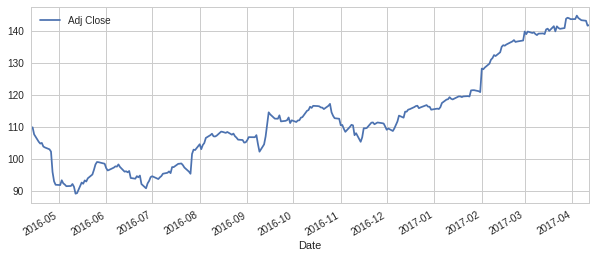

In [58]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

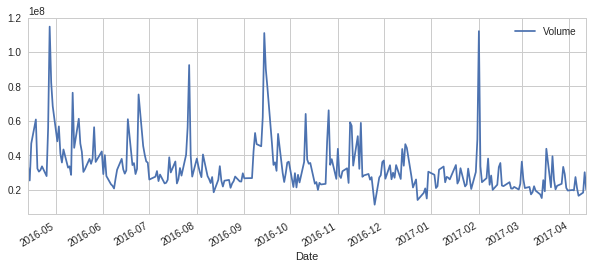

In [59]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [60]:
 ma_day = [10,20,50]
    
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = Series.rolling(AAPL['Adj Close'], ma).mean()

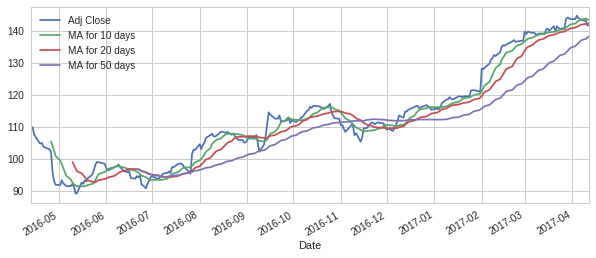

In [61]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10,4), subplots=False)

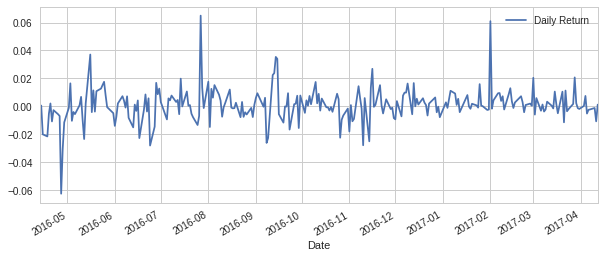

In [62]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True)

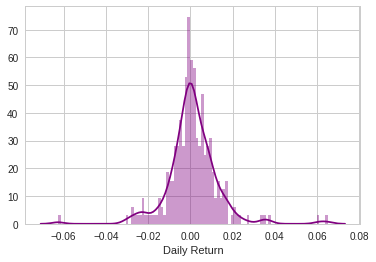

In [63]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [64]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [65]:
closing_df

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-13,109.720482,614.820007,751.719971,53.931579
2016-04-14,109.779237,620.750000,753.200012,53.941325
2016-04-15,107.575818,625.890015,759.000000,54.223894
2016-04-18,105.254888,635.349976,766.609985,55.013135
2016-04-19,104.696689,627.900024,753.929993,54.944929
2016-04-20,104.912128,632.989990,752.669983,54.165431
2016-04-21,103.776147,631.000000,759.140015,54.350560
2016-04-22,103.492149,620.500000,718.770020,50.453066
2016-04-25,102.904573,626.200012,723.150024,50.774611


In [66]:
 tech_rets = closing_df.pct_change()

In [67]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-13,NaN,NaN,NaN,NaN
2016-04-14,0.000535,0.009645,0.001969,0.000181
2016-04-15,-0.020071,0.008280,0.007700,0.005238
2016-04-18,-0.021575,0.015114,0.010026,0.014555
2016-04-19,-0.005303,-0.011726,-0.016540,-0.001240


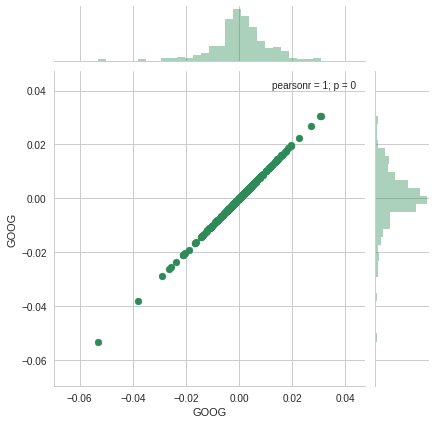

In [68]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

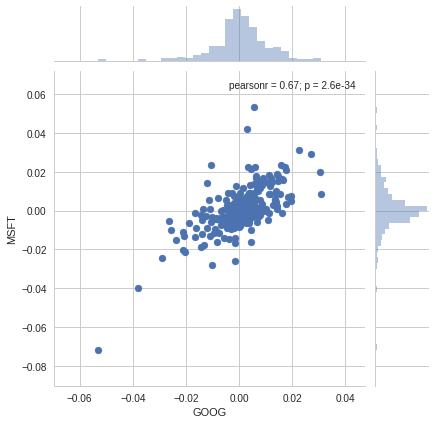

In [69]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

In [70]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-13,NaN,NaN,NaN,NaN
2016-04-14,0.000535,0.009645,0.001969,0.000181
2016-04-15,-0.020071,0.008280,0.007700,0.005238
2016-04-18,-0.021575,0.015114,0.010026,0.014555
2016-04-19,-0.005303,-0.011726,-0.016540,-0.001240


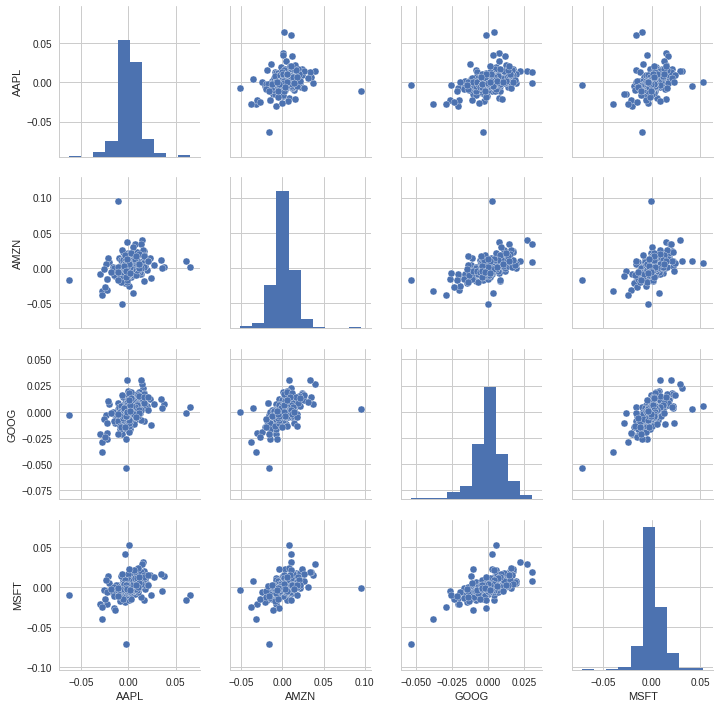

In [71]:
sns.pairplot(tech_rets.dropna())

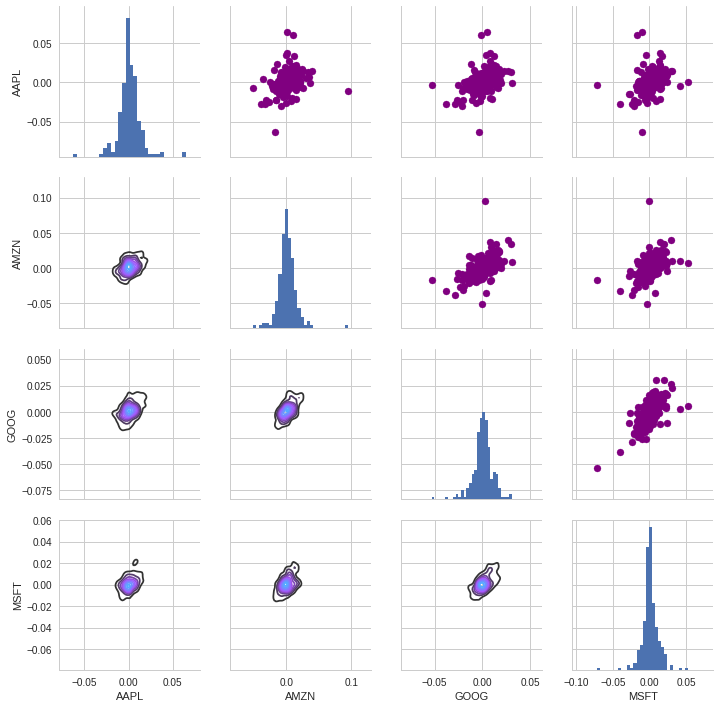

In [72]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

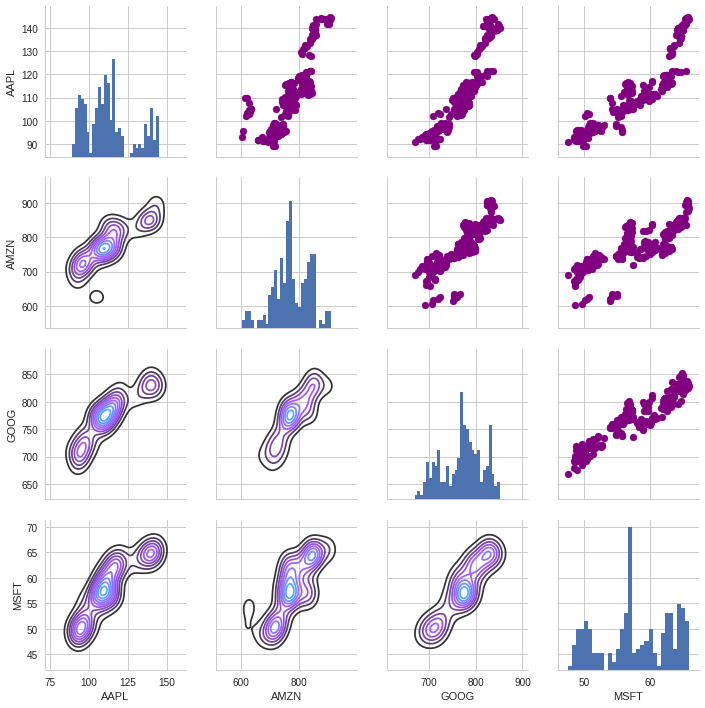

In [73]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

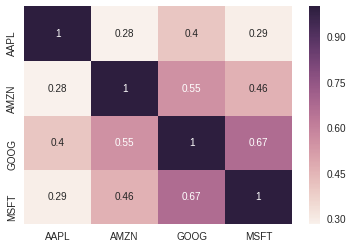

In [74]:
sns.heatmap(tech_rets.corr().dropna(), annot=True)

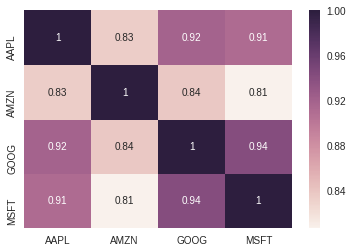

In [75]:
sns.heatmap(closing_df.corr(), annot=True)

In [76]:
rets = tech_rets.dropna()

In [77]:
area = np.pi * 20

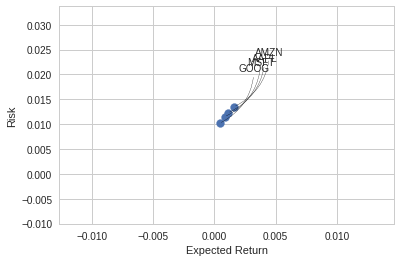

In [89]:
plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (50, 50),
        textcoords = 'offset points', ha='right', va='bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))

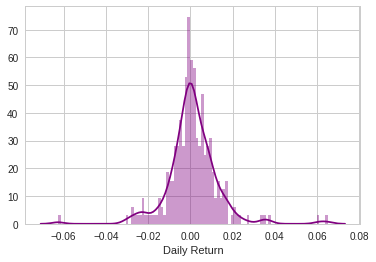

In [93]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [94]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-14,0.000535,0.009645,0.001969,0.000181
2016-04-15,-0.020071,0.008280,0.007700,0.005238
2016-04-18,-0.021575,0.015114,0.010026,0.014555
2016-04-19,-0.005303,-0.011726,-0.016540,-0.001240
2016-04-20,0.002058,0.008106,-0.001671,-0.014187


In [96]:
rets['AAPL'].quantile(0.05)

-0.017289988197368912

In [97]:
days = 362

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [101]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price    

In [99]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-13,749.159973,754.380005,744.260986,751.719971,1707100,751.719971
2016-04-14,754.010010,757.309998,752.705017,753.200012,1135300,753.200012
2016-04-15,753.979980,761.000000,752.693970,759.000000,1809300,759.000000
2016-04-18,760.460022,768.049988,757.299988,766.609985,1556000,766.609985
2016-04-19,769.510010,769.900024,749.330017,753.929993,2030500,753.929993


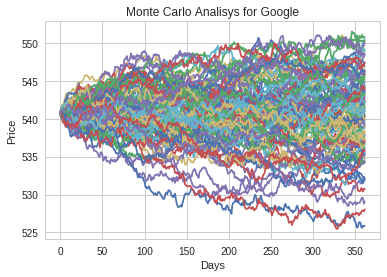

In [104]:
start_price = 540.74

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analisys for Google')

In [105]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]   

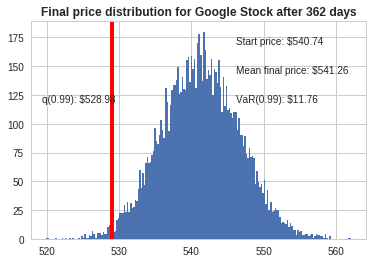

In [106]:
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');